# Crimes in India

The Rate of crimes in society is an ever-increasing problem. In recent times, many types of crimes, such as theft, fraud, assault, and even cybercrime, have been on the rise. India, too, has seen an increase in crime rates in recent years, making it one of the most affected countries in terms of crime. 

#### How India is dealing with it

The increasing crime rates in India have become a growing concern for citizens and law enforcement. With more than four million reported cases of crime in the past year, the Indian government has been taking steps to tackle this issue. 

In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

### Data collected From : https://www.census2011.co.in/states.php

In [3]:
a = pd.read_excel('pop.xlsx')
a.head()

,#,State,Population,Increase,Area(Km2),Density,Sex-Ratio,Literacy
0,-,India,1210854977,0.1764,3287240,382,940,74.04
1,1,Uttar Pradesh,199812341,0.2023,240928,829,912,67.68
2,2,Maharashtra,112374333,0.1599,307713,365,929,82.34
3,3,Bihar,104099452,0.2542,94163,1106,918,61.80
4,4,West Bengal,91276115,0.1384,88752,1028,950,76.26


In [4]:
b=pd.read_csv('crimes.csv')
b.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,Persons_Acquitted,Persons_against_whom_cases_Compounded_or_Withdrawn,Persons_Arrested,Persons_Chargesheeted,Persons_Convicted,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_end,Persons_in_Custody_or_on_Bail_during_Trial_at_Year_End,Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evidence_or_any_other_reason,Persons_Trial_Completed,Persons_under_Trial_at_Year_beginning,Total_Persons_under_Trial,Unnamed: 16
0,Andaman & Nicobar Islands,2001,Rape,01. Rape,6,0,3,3,0,6,6,45,0,6,48,51,NaN
1,Andhra Pradesh,2001,Rape,01. Rape,1168,13,1150,1021,246,450,545,2191,34,1414,2597,3618,NaN
2,Arunachal Pradesh,2001,Rape,01. Rape,1,0,51,31,2,25,30,347,15,3,319,350,NaN
3,Assam,2001,Rape,01. Rape,403,14,928,585,120,806,959,2331,190,523,2283,2868,NaN
4,Bihar,2001,Rape,01. Rape,756,0,1400,1302,217,719,576,5963,241,973,5634,6936,NaN


we have got 2 datasets here, let go through each dataset one by one

In [5]:
b['Group_Name'].unique()

array(['Rape', 'Kidnapping & Abduction - Women & Girls', 'Dowry Deaths',
       'Molestation', 'Sexual harassment',
       'Cruelty by Husband and Relatives', 'Importation of Girls',
       'Immoral Traffic (Prevention) Act', 'Dowry Prohibition Act',
       'Indecent Representation of Women (Prohibition) Act',
       'Sati Prevention Act', 'Total Crime Against Women'], dtype=object)

This give all categories in Group_Name column

In [6]:
b.columns

Index(['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name',
       'Persons_Acquitted',
       'Persons_against_whom_cases_Compounded_or_Withdrawn',
       'Persons_Arrested', 'Persons_Chargesheeted', 'Persons_Convicted',
       'Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning',
       'Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_end',
       'Persons_in_Custody_or_on_Bail_during_Trial_at_Year_End',
       'Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evidence_or_any_other_reason',
       'Persons_Trial_Completed', 'Persons_under_Trial_at_Year_beginning',
       'Total_Persons_under_Trial', 'Unnamed: 16'],
      dtype='object')

One important thing to note is that the crime data is from 2001 to 2010 whereas the literacy rate is for 2001 and 2011 census. For the sake of uniformity, we shall only deal with the year 2010 since that is common to both datasets.So we have to clean up this dataset

In [7]:
b=b.where(b['Group_Name']=='Total Crime Against Women').dropna(how='all')
b=b.where(b['Year']==2010).dropna(how='all')
b=b[['Area_Name','Year','Group_Name','Total_Persons_under_Trial']]
b.head()

,Area_Name,Year,Group_Name,Total_Persons_under_Trial
4130,Andaman & Nicobar Islands,2010.0,Total Crime Against Women,606.0
4131,Andhra Pradesh,2010.0,Total Crime Against Women,95666.0
4132,Arunachal Pradesh,2010.0,Total Crime Against Women,1652.0
4133,Assam,2010.0,Total Crime Against Women,23907.0
4134,Bihar,2010.0,Total Crime Against Women,67721.0


Looking upon our 2 datasets crimes and pop, we can notice that there are few mismatches in the spellings

In [9]:
a=a.replace('Andaman and Nicobar Islands','Andaman & Nicobar Islands')
a=a.replace('Dadra and Nagar Haveli','Dadra & Nagar Haveli')
a=a.replace('Daman and Diu','Daman & Diu')
a=a.replace('Orissa','Odisha')
a=a.replace('Jammu and Kashmir','Jammu & Kashmir')
a=a.drop([14])

In [11]:
a

,#,State,Population,Increase,Area(Km2),Density,Sex-Ratio,Literacy
0,-,India,1210854977,0.1764,3287240,382,940,74.04
1,1,Uttar Pradesh,199812341,0.2023,240928,829,912,67.68
2,2,Maharashtra,112374333,0.1599,307713,365,929,82.34
3,3,Bihar,104099452,0.2542,94163,1106,918,61.80
4,4,West Bengal,91276115,0.1384,88752,1028,950,76.26
5,5,Andhra Pradesh,84580777,0.1098,275045,308,993,67.02
6,6,Madhya Pradesh,72626809,0.2035,308252,236,931,69.32
7,7,Tamil Nadu,72147030,0.1561,130060,555,996,80.09
8,8,Rajasthan,68548437,0.2131,342239,200,928,66.11
9,9,Karnataka,61095297,0.1560,191791,319,973,75.36


For doing further analysis , we're now going to merge both datasets

In [12]:
a=a.merge(b,left_on='State',right_on='Area_Name')
a['Total crimes per capita'] = a['Total_Persons_under_Trial'] / a['Population']
a.head()

,#,State,Population,Increase,Area(Km2),Density,Sex-Ratio,Literacy,Area_Name,Year,Group_Name,Total_Persons_under_Trial,Total crimes per capita
0,1,Uttar Pradesh,199812341,0.2023,240928,829,912,67.68,Uttar Pradesh,2010.0,Total Crime Against Women,166368.0,0.000833
1,2,Maharashtra,112374333,0.1599,307713,365,929,82.34,Maharashtra,2010.0,Total Crime Against Women,306044.0,0.002723
2,3,Bihar,104099452,0.2542,94163,1106,918,61.80,Bihar,2010.0,Total Crime Against Women,67721.0,0.000651
3,4,West Bengal,91276115,0.1384,88752,1028,950,76.26,West Bengal,2010.0,Total Crime Against Women,137404.0,0.001505
4,5,Andhra Pradesh,84580777,0.1098,275045,308,993,67.02,Andhra Pradesh,2010.0,Total Crime Against Women,95666.0,0.001131


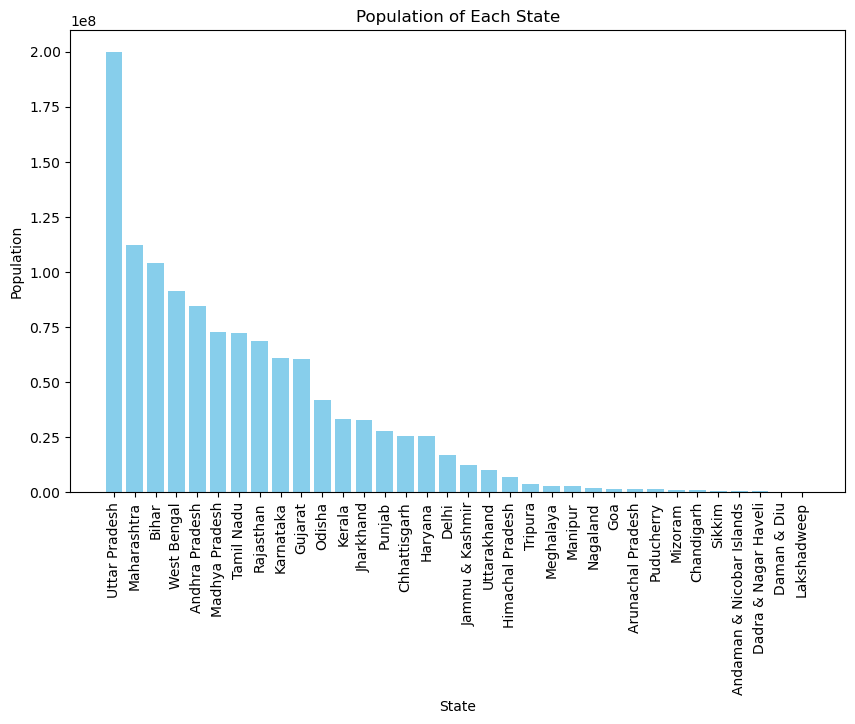

In [13]:


# Assuming your dataset is named 'merged_data'
# Replace 'merged_data' with the actual name of your DataFrame
state_population = a.groupby('State')['Population'].sum().reset_index()

# Sorting the data by population in descending order
state_population_sorted = state_population.sort_values(by='Population', ascending=False)

# Plotting the population of each state
plt.figure(figsize=(10, 6))
plt.bar(state_population_sorted['State'], state_population_sorted['Population'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Population')
plt.title('Population of Each State')
plt.show()

#### This is the plot bar for Population across each state and as it's clearly visible Uttar Pradesh has the hihest Popuation of all states in India

Top 5 in Population are:
    1. UP
    2. Maharshtra
    3. Bihar
    4. West Bengal
    5. Andhra Pradesh
    
 Least 3 in population are:
    1. Dadra & Nagar Haveli
    2. Daman & Diu
    3. Lakshadweep

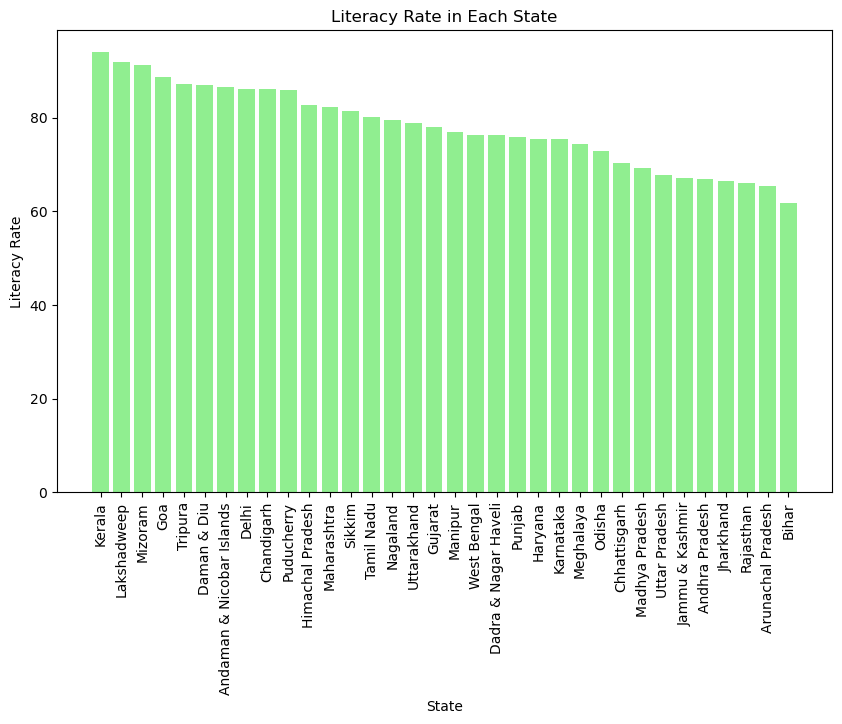

In [14]:
state_literacy = a.groupby('State')['Literacy'].mean().reset_index()

state_literacy_sorted = state_literacy.sort_values(by='Literacy', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(state_literacy_sorted['State'], state_literacy_sorted['Literacy'], color='lightgreen')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Literacy Rate')
plt.title('Literacy Rate in Each State')
plt.show()

#### As evident from the above bar chart Kerala Tops the Literacy rate and the char gradually shows the literacy rate in highest to lowest order.

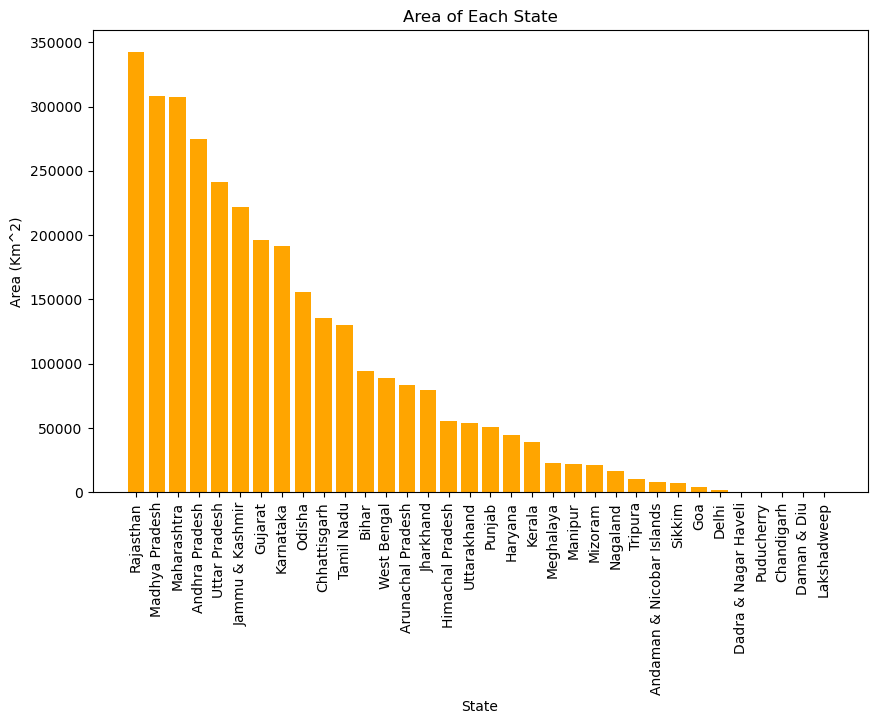

In [15]:
state_area = a.groupby('State')['Area(Km2)'].sum().reset_index()

state_area_sorted = state_area.sort_values(by='Area(Km2)', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(state_area_sorted['State'], state_area_sorted['Area(Km2)'], color='orange')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Area (Km^2)')
plt.title('Area of Each State')
plt.show()


#### It's evidently clear from the above plot, Rajasthan tops the list with more than 340000 in Area amongst all states in India and Lakshadweep being the least in area.

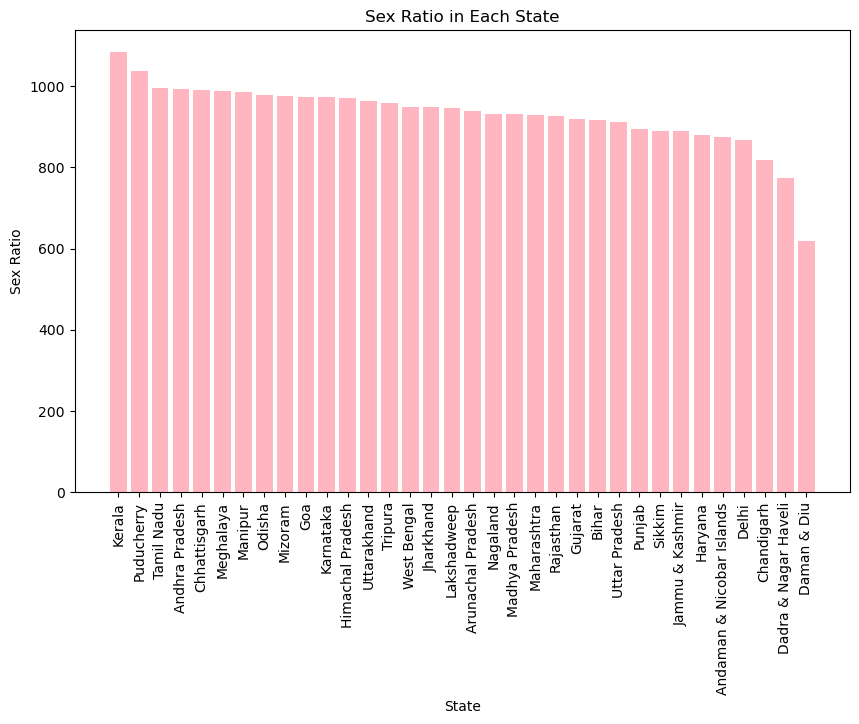

In [16]:
state_sex_ratio = a.groupby('State')['Sex-Ratio'].mean().reset_index()

state_sex_ratio_sorted = state_sex_ratio.sort_values(by='Sex-Ratio', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(state_sex_ratio_sorted['State'], state_sex_ratio_sorted['Sex-Ratio'], color='lightpink')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Sex Ratio')
plt.title('Sex Ratio in Each State')
plt.show()


#### This is a beautiful representation of sex ratio (number of females per 1000 males) in each state.

Each bar represents a state, and the height of the bar represents the average sex ratio. This visual representation makes it easier to compare the sex ratios across different states.

Overall, this analysis provides valuable insights into the gender distribution within each state, helping to understand variations in sex ratios across different regions.